In [1]:
using Turing, Distributions, Plots, Random

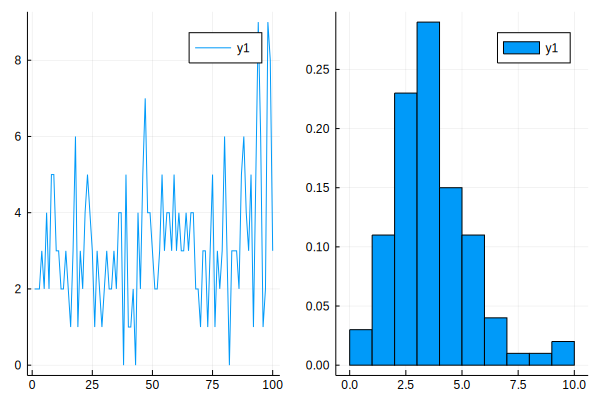

In [65]:
n=100 # the number of observations

# Generate a data set for testing
dist = Poisson(3)
x = [rand(dist) for i in 1:n]

time = plot(1:n, x)
hist = histogram(x, normed=true)
plot(time, hist)

# Analytic Solution

In [71]:
# Our prior belief about the probability of heads in a coin toss.
prior_belief = Gamma(3, 1)

Gamma{Float64}(α=3.0, θ=1.0)

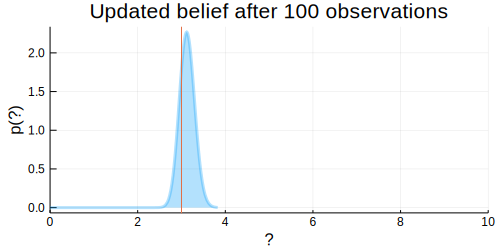

In [72]:
# Import StatsPlots for animating purposes.
using StatsPlots

# Animate posterior distribution as number of observations increases.
default(display=:inline)
for i in 1:n

    # Count the number of heads and tails.
    count = sum(x[1:i-1])
    
    # Update our prior belief in closed form (this is possible because we use a conjugate prior).
    updated_belief = Gamma(prior_belief.α + count, 1/((1/prior_belief.θ) + i))

    # Plotting
    plot(updated_belief, 
        size = (500, 250), 
        title = "Updated belief after $i observations",
        xlabel = "λ", 
        ylabel = "p(λ)", 
        legend = nothing,
        xlim = (0,10),
        fill=0, α=0.3, w=3)
    vline!([3.0])
end
default(display=:none)

# Turing Solution

In [62]:
@model poisson_model(x, n) = begin
    
    λ ~ Gamma(1,2)
    
    for i in 1:n
        x[i] ~ Poisson(λ)
    end
end

poisson_model (generic function with 3 methods)

In [63]:
model = poisson_model(x, n)
chain = sample(model, NUTS(0.65), 1000);

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/john/.julia/packages/Turing/xGrY5/src/inference/hmc.jl:547
Sampling 100%|███████████████████████████████| Time: 0:00:00


In [64]:
describe(chain)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean    │ std      │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64 │ Float64  │ Float64    │ Float64    │ Any     │
├─────┼────────────┼─────────┼──────────┼────────────┼────────────┼─────────┤
│ 1   │ λ          │ 3.23552 │ 0.172132 │ 0.00769796 │ 0.00206103 │ 362.874 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%   │ 50.0%   │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ λ          │ 2.88478 │ 3.11605 │ 3.24064 │ 3.34866 │ 3.58392 │


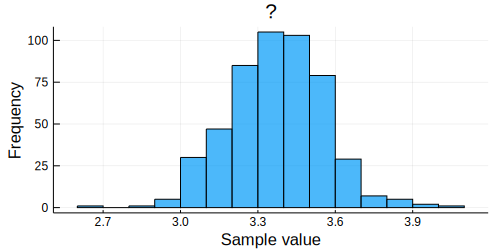

In [61]:
plot(chain[:λ], seriestype = :histogram)